# Data Preparation 8

Dataframe treatment (outliers, feature extraction, ...)

In [1221]:
import pandas as pd
from IPython.display import display
import numpy as np
import sqlite3
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
import matplotlib.pyplot as plt
from pandas import DataFrame
import scipy.stats as stats
import pylab

In [1222]:
admissions=pd.read_csv('MAIN_DF_7.csv')
admissions=admissions.drop(['Unnamed: 0'], axis=1)
admissions=admissions.reset_index(drop=True)
print(admissions.shape)
print('unique SUBJECT_ID:', admissions.SUBJECT_ID.nunique())
print('unique HADM_ID   :', admissions.HADM_ID.nunique())
print('unique ICUSTAY_ID:', admissions.ICUSTAY_ID.nunique())
admissions.head()

(23055, 61)
unique SUBJECT_ID: 17469
unique HADM_ID   : 21650
unique ICUSTAY_ID: 23055


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,GENDER,AGE_AD,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,DIAGNOSIS,FIRST_CAREUNIT,FIRST_WARDID,INTIME,OUTTIME,LOS,LOS_C,TIMEDELTA,TIMEDELTA_C,HOSPITAL_EXPIRE_FLAG,BMI,I_VEN,NI_VEN,227456_V,225624_V,220615_V,220621_V,226537_V,225664_V,220545_V,226540_V,225668_V,220235_V,223830_V,220734_V,227457_V,220224_V,220227_V,220645_V,226534_V,225690_V,220546_V,220739_V,223901_V,223900_V,223835_V,224688_V,224689_V,224690_V,220210_V,220277_V,220051_V,220052_V,220050_V,220045_V,220180_V,220181_V,220179_V,223761_V,224027_V,PrevHospDays
0,23,124321,234044,M,75.26000,2157-10-18 19:34:00,2157-10-25 14:00:00,EMERGENCY,Medicare,WHITE,BRAIN MASS,SICU,57,2157-10-21 11:40:38,2157-10-22 16:08:48,1.1862,1-2,6.77,6-10,0,21.7,0,0,NaN,14.0,0.6,136.0,NaN,123.0,36.9,NaN,NaN,NaN,NaN,NaN,208.0,NaN,NaN,144.0,NaN,NaN,14.8,Spontaneously,Obeys Commands,Oriented,NaN,NaN,NaN,NaN,14.0,100.0,74.0,86.0,181.0,77.0,45.0,50.0,67.0,35.4,Warm,2.67
1,34,144319,290505,M,90.89934,2191-02-23 05:23:00,2191-02-25 20:20:00,EMERGENCY,Medicare,WHITE,BRADYCARDIA,CCU,7,2191-02-23 05:25:32,2191-02-24 19:24:10,1.5824,1-2,2.62,0-3,0,27.4,0,0,NaN,36.0,1.6,116.0,NaN,133.0,35.9,NaN,NaN,NaN,NaN,NaN,343.0,NaN,NaN,139.0,NaN,NaN,7.1,None,Localizes Pain,No Response-ETT,60.0,14.0,0.0,22.0,14.0,98.0,NaN,NaN,NaN,72.0,66.0,78.0,112.0,36.1,Warm,0.00
2,36,165660,241249,M,72.73000,2134-05-10 11:30:00,2134-05-20 13:16:00,ELECTIVE,Medicare,WHITE,VENTRAL HERNIA/SDA,MICU,52,2134-05-12 06:52:47,2134-05-16 15:14:20,4.3483,>4,10.07,>10,0,32.7,1,0,2.8,19.0,0.9,126.0,NaN,92.0,36.3,NaN,1.0,60.0,7.29,NaN,174.0,58.0,94.0,139.0,NaN,0.6,15.3,Spontaneously,Obeys Commands,Oriented,100.0,20.0,0.0,20.0,20.0,91.0,NaN,NaN,NaN,94.0,72.0,84.0,122.0,37.4,Warm,1.81
3,85,112077,291697,M,76.85000,2167-07-25 18:49:00,2167-07-30 15:24:00,EMERGENCY,Medicare,WHITE,PNEUMONIA,MICU,23,2167-07-25 18:50:37,2167-07-27 18:37:35,1.9909,1-2,4.86,3-6,0,31.8,0,0,NaN,17.0,1.4,114.0,NaN,NaN,26.4,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,137.0,NaN,NaN,8.3,Spontaneously,Obeys Commands,Oriented,NaN,NaN,NaN,NaN,39.0,99.0,NaN,NaN,NaN,136.0,87.0,99.0,166.0,37.0,Warm,0.00
4,107,182383,252542,M,69.66000,2121-11-30 19:24:00,2121-12-05 14:18:00,EMERGENCY,Medicare,NW,HYPERKALEMIA;CONGESTIVE HEART FAILURE,MICU,23,2121-11-30 19:24:56,2121-12-01 21:20:57,1.0806,1-2,4.79,3-6,0,31.3,0,0,NaN,36.0,5.8,125.0,NaN,110.0,40.3,NaN,NaN,NaN,NaN,NaN,303.0,NaN,NaN,139.0,NaN,NaN,14.2,Spontaneously,Obeys Commands,Oriented,NaN,NaN,NaN,NaN,19.0,97.0,NaN,NaN,NaN,64.0,67.0,88.0,155.0,36.7,Warm,0.00


In [1223]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_V                14548
225624_V                  719
220615_V                  722
220621_V                  768
226537_V                15888
225664_V                 5674
220545_V                  746
226540_V                17907
225668_V                10719
220235_V                11492
223830_V  

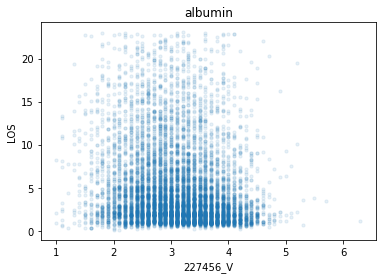

In [1224]:
admissions.plot.scatter(x='227456_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('albumin')
plt.show()

In [1225]:
admissions['227456_V']=admissions['227456_V'].mask(admissions['227456_V'].gt(5))

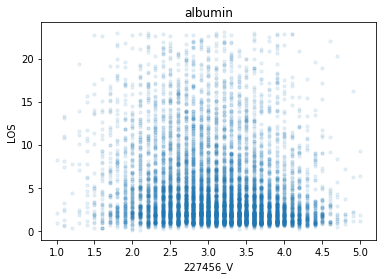

In [1226]:
admissions.plot.scatter(x='227456_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('albumin')
plt.show()

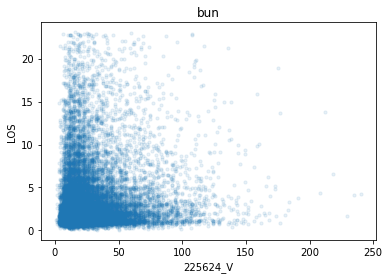

In [1227]:
admissions.plot.scatter(x='225624_V',y='LOS',alpha=0.10, s=10)
plt.title('bun')
plt.show()

In [1228]:
admissions['225624_V']=admissions['225624_V'].mask(admissions['225624_V'].gt(140))

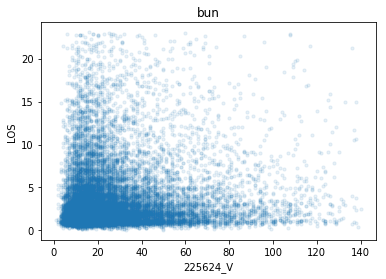

In [1229]:
admissions.plot.scatter(x='225624_V',y='LOS',alpha=0.10, s=10)
plt.title('bun')
plt.show()

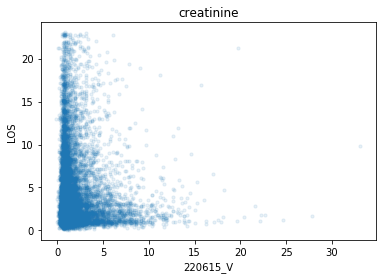

In [1230]:
admissions.plot.scatter(x='220615_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('creatinine')
plt.show()

In [1231]:
admissions['220615_V']=admissions['220615_V'].mask(admissions['220615_V'].gt(12))

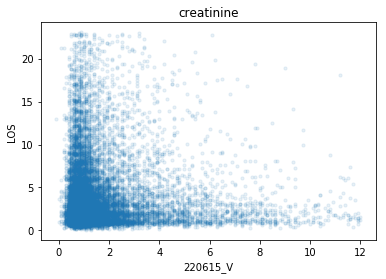

In [1232]:
admissions.plot.scatter(x='220615_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('creatinine')
plt.show()

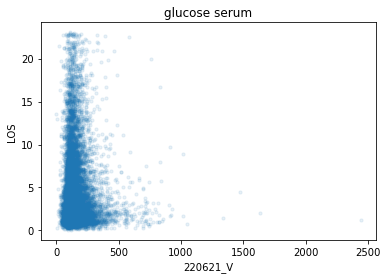

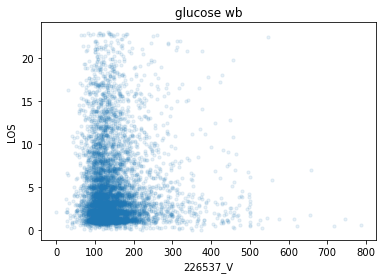

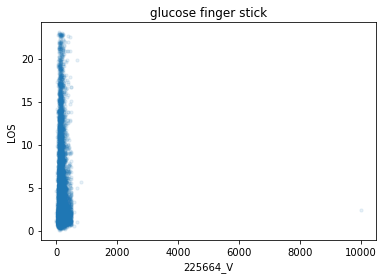

In [1233]:
admissions.plot.scatter(x='220621_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-25, 800)
plt.title('glucose serum')
plt.show()
admissions.plot.scatter(x='226537_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('glucose wb')
plt.show()
admissions.plot.scatter(x='225664_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-25, 800)
plt.title('glucose finger stick')
plt.show()

In [1234]:
admissions=admissions.drop(['226537_V', '225664_V'], axis=1)
admissions.shape

(23055, 59)

In [1235]:
admissions['220621_V']=admissions['220621_V'].mask(admissions['220621_V'].gt(500))

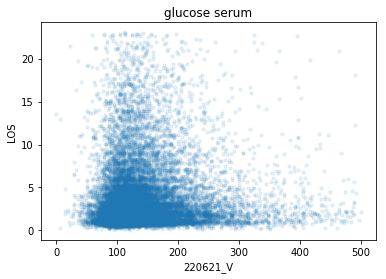

In [1236]:
admissions.plot.scatter(x='220621_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-25, 800)
plt.title('glucose serum')
plt.show()

In [1237]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_V                14559
225624_V                  782
220615_V                  788
220621_V                  901
220545_V                  746
226540_V                17907
225668_V                10719
220235_V                11492
223830_V                11414
220734_V                14115
227457_V  

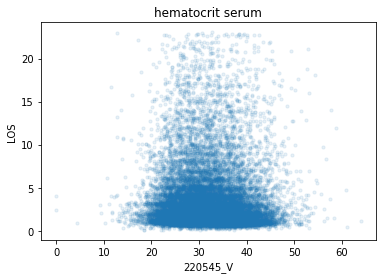

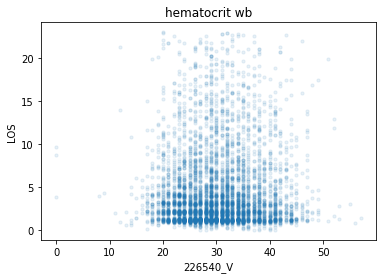

In [1238]:
admissions.plot.scatter(x='220545_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('hematocrit serum')
plt.show()
admissions.plot.scatter(x='226540_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('hematocrit wb')
plt.show()

In [1239]:
admissions=admissions.drop(['226540_V'], axis=1)
admissions.shape

(23055, 58)

In [1240]:
admissions['220545_V']=admissions['220545_V'].mask(admissions['220545_V'].gt(55))
admissions['220545_V']=admissions['220545_V'].mask(admissions['220545_V'].lt(15))

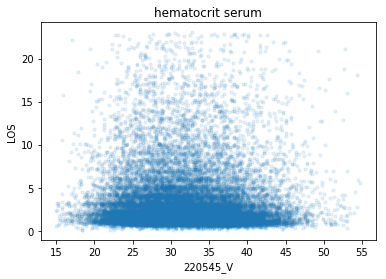

In [1241]:
admissions.plot.scatter(x='220545_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('hematocrit serum')
plt.show()

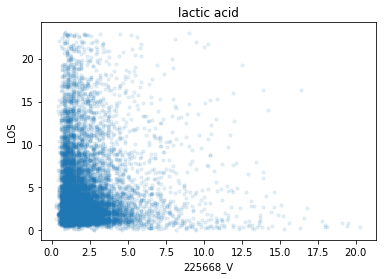

In [1242]:
admissions.plot.scatter(x='225668_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('lactic acid')
plt.show()

In [1243]:
admissions['225668_V']=admissions['225668_V'].mask(admissions['225668_V'].gt(10))

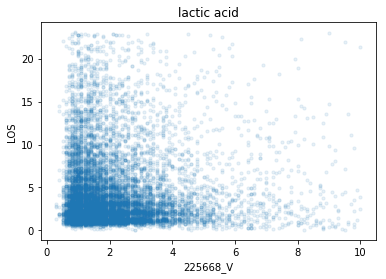

In [1244]:
admissions.plot.scatter(x='225668_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('lactic acid')
plt.show()

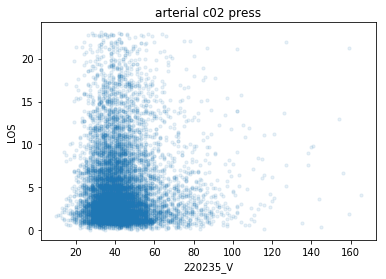

In [1245]:
admissions.plot.scatter(x='220235_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('arterial c02 press')
plt.show()

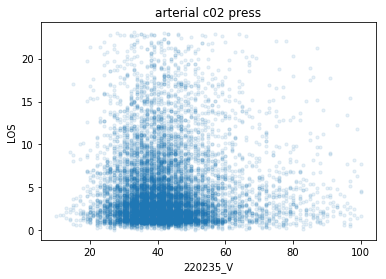

In [1246]:
admissions['220235_V']=admissions['220235_V'].mask(admissions['220235_V'].gt(100))
admissions.plot.scatter(x='220235_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('arterial c02 press')
plt.show()

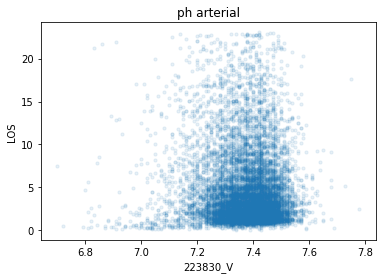

In [1247]:
admissions.plot.scatter(x='223830_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('ph arterial')
plt.show()

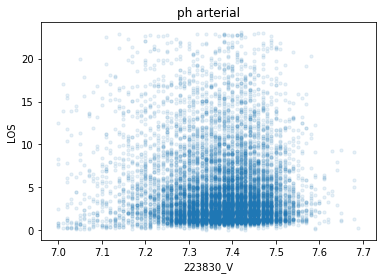

In [1248]:
admissions['223830_V']=admissions['223830_V'].mask(admissions['223830_V'].lt(7))
admissions['223830_V']=admissions['223830_V'].mask(admissions['223830_V'].gt(7.7))
admissions.plot.scatter(x='223830_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('ph arterial')
plt.show()

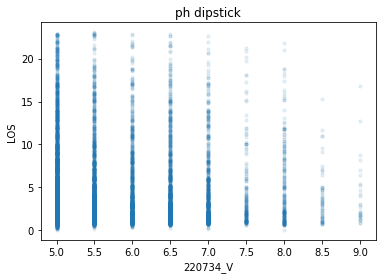

In [1249]:
admissions.plot.scatter(x='220734_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('ph dipstick')
plt.show()

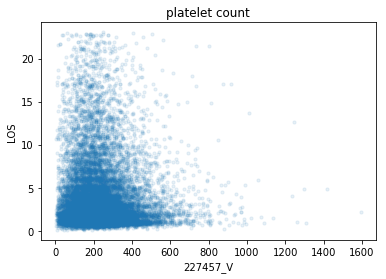

In [1250]:
admissions.plot.scatter(x='227457_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('platelet count')
plt.show()

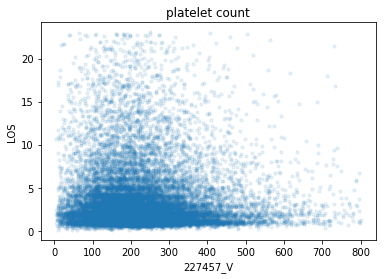

In [1251]:
admissions['227457_V']=admissions['227457_V'].mask(admissions['227457_V'].gt(800))
admissions.plot.scatter(x='227457_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('platelet count')
plt.show()

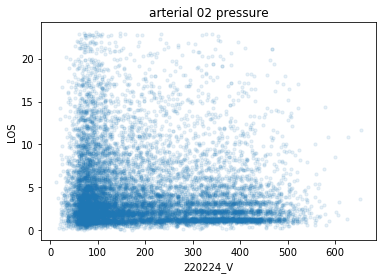

In [1252]:
admissions.plot.scatter(x='220224_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('arterial 02 pressure')
plt.show()

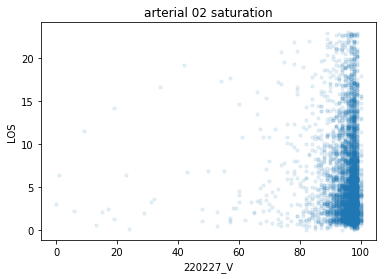

In [1253]:
admissions.plot.scatter(x='220227_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('arterial 02 saturation')
plt.show()

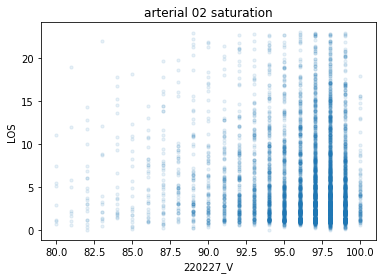

In [1254]:
admissions['220227_V']=admissions['220227_V'].mask(admissions['220227_V'].lt(80))
admissions.plot.scatter(x='220227_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('arterial 02 saturation')
plt.show()

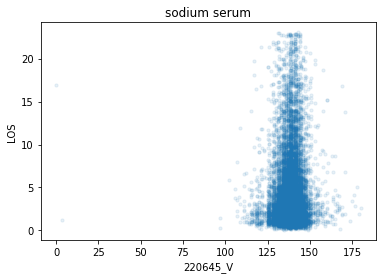

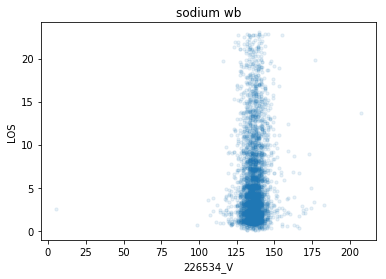

In [1255]:
admissions.plot.scatter(x='220645_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('sodium serum')
plt.show()
admissions.plot.scatter(x='226534_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('sodium wb')
plt.show()

In [1256]:
admissions=admissions.drop(['226534_V'], axis=1)
admissions.shape

(23055, 57)

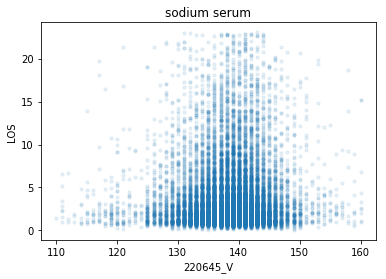

In [1257]:
admissions['220645_V']=admissions['220645_V'].mask(admissions['220645_V'].gt(160))
admissions['220645_V']=admissions['220645_V'].mask(admissions['220645_V'].lt(110))
admissions.plot.scatter(x='220645_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('sodium serum')
plt.show()

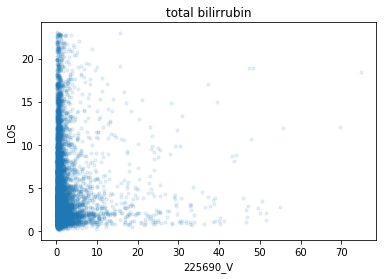

In [1258]:
admissions.plot.scatter(x='225690_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('total bilirrubin')
plt.show()

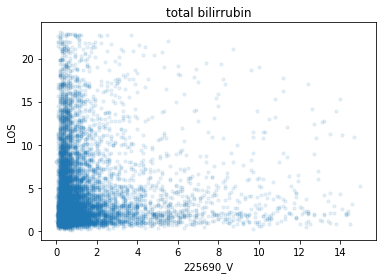

In [1259]:
admissions['225690_V']=admissions['225690_V'].mask(admissions['225690_V'].gt(15))
admissions.plot.scatter(x='225690_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('total bilirrubin')
plt.show()

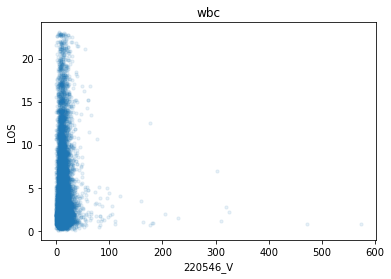

In [1260]:
admissions.plot.scatter(x='220546_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('wbc')
plt.show()

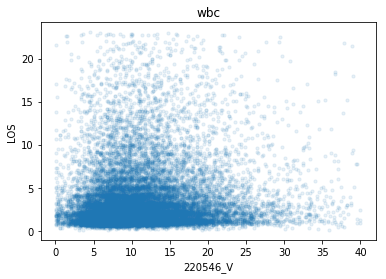

In [1261]:
admissions['220546_V']=admissions['220546_V'].mask(admissions['220546_V'].gt(40))
admissions.plot.scatter(x='220546_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('wbc')
plt.show()

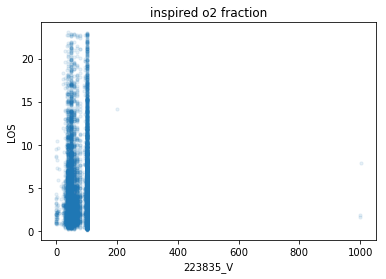

In [1262]:
admissions.plot.scatter(x='223835_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 200)
plt.title('inspired o2 fraction')
plt.show()

In [1263]:
admissions['223835_V']=admissions['223835_V'].mask(admissions['223835_V'].gt(100))

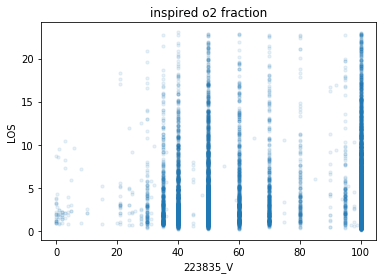

In [1264]:
admissions.plot.scatter(x='223835_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 200)
plt.title('inspired o2 fraction')
plt.show()

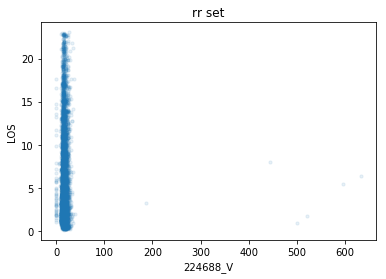

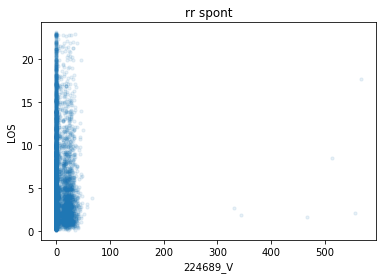

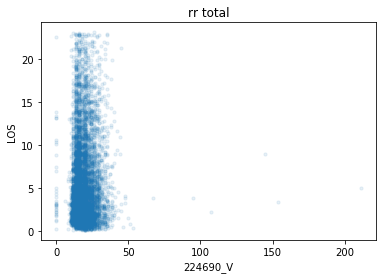

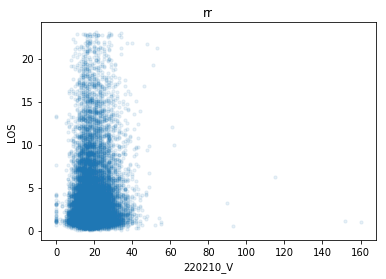

In [1265]:
admissions.plot.scatter(x='224688_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('rr set')
plt.show()
admissions.plot.scatter(x='224689_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('rr spont')
plt.show()
admissions.plot.scatter(x='224690_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('rr total')
plt.show()
admissions.plot.scatter(x='220210_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('rr')
plt.show()

In [1266]:
admissions=admissions.drop(['224688_V', '224689_V', '224690_V'], axis=1)
admissions.shape

(23055, 54)

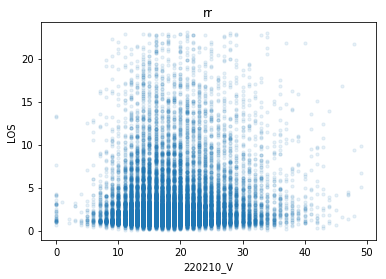

In [1267]:
admissions['220210_V']=admissions['220210_V'].mask(admissions['220210_V'].gt(50))
admissions.plot.scatter(x='220210_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('rr')
plt.show()

In [1268]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_V                14559
225624_V                  782
220615_V                  788
220621_V                  901
220545_V                  807
225668_V                10837
220235_V                11549
223830_V                11479
220734_V                14115
227457_V                  852
220224_V  

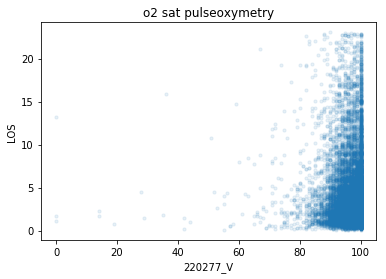

In [1269]:
admissions.plot.scatter(x='220277_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('o2 sat pulseoxymetry')
plt.show()

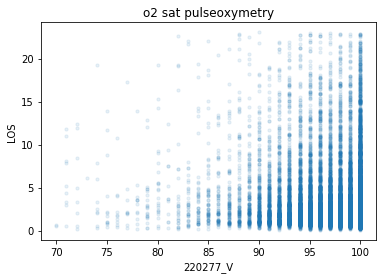

In [1270]:
admissions['220277_V']=admissions['220277_V'].mask(admissions['220277_V'].lt(70))
admissions.plot.scatter(x='220277_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('o2 sat pulseoxymetry')
plt.show()

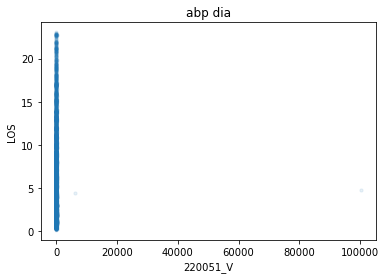

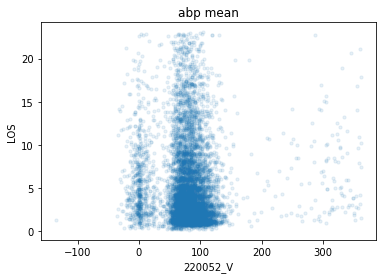

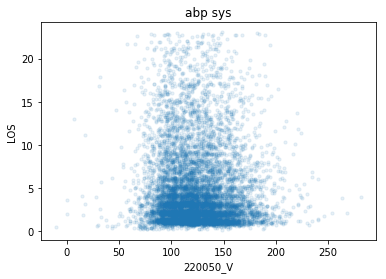

In [1271]:
admissions.plot.scatter(x='220051_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('abp dia')
plt.show()
admissions.plot.scatter(x='220052_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('abp mean')
plt.show()
admissions.plot.scatter(x='220050_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('abp sys')
plt.show()

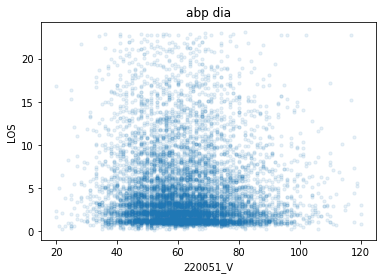

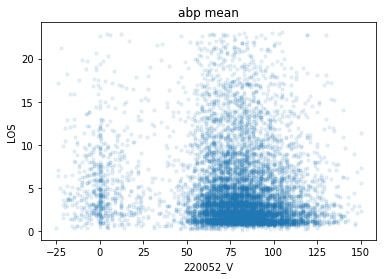

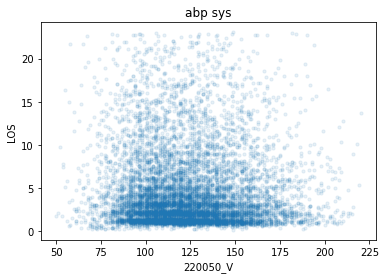

In [1272]:
admissions['220051_V']=admissions['220051_V'].mask(admissions['220051_V'].gt(120))
admissions['220052_V']=admissions['220052_V'].mask(admissions['220052_V'].gt(150))
admissions['220050_V']=admissions['220050_V'].mask(admissions['220050_V'].gt(220))
admissions['220051_V']=admissions['220051_V'].mask(admissions['220051_V'].lt(20))
admissions['220052_V']=admissions['220052_V'].mask(admissions['220052_V'].lt(-25))
admissions['220050_V']=admissions['220050_V'].mask(admissions['220050_V'].lt(50))
admissions.plot.scatter(x='220051_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('abp dia')
plt.show()
admissions.plot.scatter(x='220052_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('abp mean')
plt.show()
admissions.plot.scatter(x='220050_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('abp sys')
plt.show()

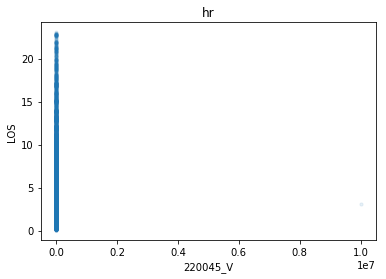

In [1273]:
admissions.plot.scatter(x='220045_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('hr')
plt.show()

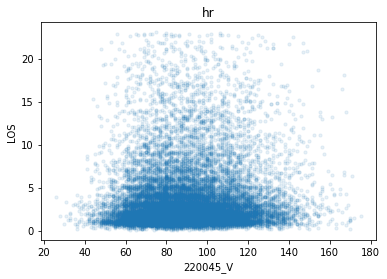

In [1274]:
admissions['220045_V']=admissions['220045_V'].mask(admissions['220045_V'].gt(175))
admissions['220045_V']=admissions['220045_V'].mask(admissions['220045_V'].lt(25))
admissions.plot.scatter(x='220045_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('hr')
plt.show()

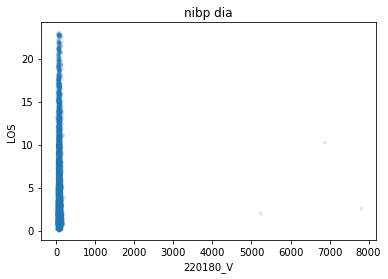

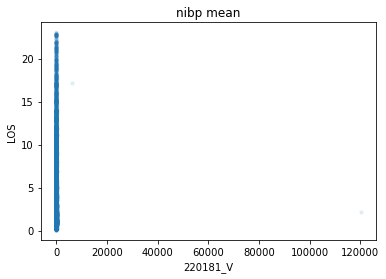

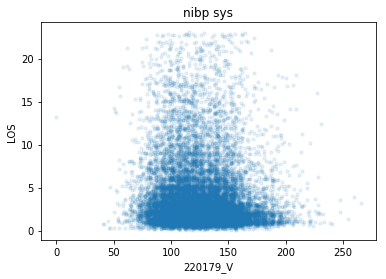

In [1275]:
admissions.plot.scatter(x='220180_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('nibp dia')
plt.show()
admissions.plot.scatter(x='220181_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('nibp mean')
plt.show()
admissions.plot.scatter(x='220179_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('nibp sys')
plt.show()

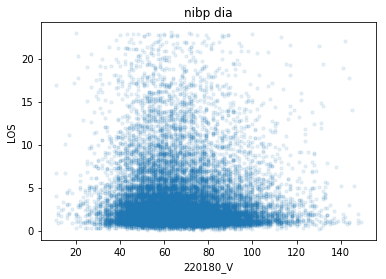

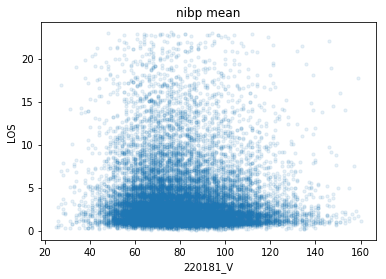

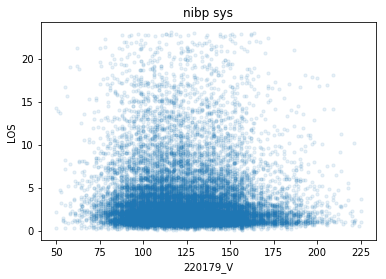

In [1276]:
admissions['220180_V']=admissions['220180_V'].mask(admissions['220180_V'].gt(150))
admissions['220181_V']=admissions['220181_V'].mask(admissions['220181_V'].gt(160))
admissions['220179_V']=admissions['220179_V'].mask(admissions['220179_V'].gt(225))
admissions['220180_V']=admissions['220180_V'].mask(admissions['220180_V'].lt(10))
admissions['220181_V']=admissions['220181_V'].mask(admissions['220181_V'].lt(25))
admissions['220179_V']=admissions['220179_V'].mask(admissions['220179_V'].lt(50))
admissions.plot.scatter(x='220180_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('nibp dia')
plt.show()
admissions.plot.scatter(x='220181_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('nibp mean')
plt.show()
admissions.plot.scatter(x='220179_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('nibp sys')
plt.show()

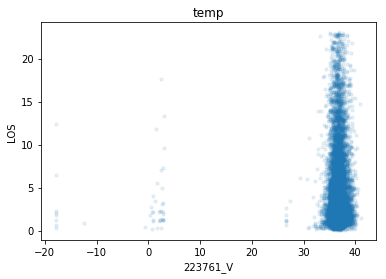

In [1277]:
admissions.plot.scatter(x='223761_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('temp')
plt.show()

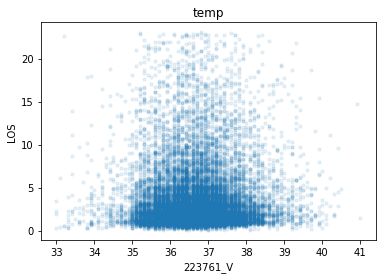

In [1278]:
admissions['223761_V']=admissions['223761_V'].mask(admissions['223761_V'].lt(33))
admissions.plot.scatter(x='223761_V',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('temp')
plt.show()

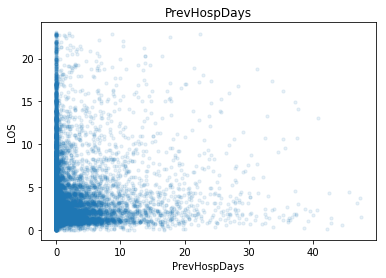

In [1279]:
admissions.plot.scatter(x='PrevHospDays',y='LOS',alpha=0.10, s=10)
#plt.xlim(-5, 80)
plt.title('PrevHospDays')
plt.show()

In [1282]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_V                14559
225624_V                  782
220615_V                  788
220621_V                  901
220545_V                  807
225668_V                10837
220235_V                11549
223830_V                11479
220734_V                14115
227457_V                  852
220224_V  

In [1283]:
admissions.shape

(23055, 54)

In [1284]:
admissions['225624_V'] = admissions['225624_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1285]:
admissions['220615_V'] = admissions['220615_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1286]:
admissions['220621_V'] = admissions['220621_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1287]:
admissions['220545_V'] = admissions['220545_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1288]:
admissions['227457_V'] = admissions['227457_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1289]:
admissions['220645_V'] = admissions['220645_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1290]:
admissions['220546_V'] = admissions['220546_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1291]:
admissions['220210_V'] = admissions['220210_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1292]:
admissions['220277_V'] = admissions['220277_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1293]:
admissions['220180_V'] = admissions['220180_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1294]:
admissions['220181_V'] = admissions['220181_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1295]:
admissions['220179_V'] = admissions['220179_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1296]:
admissions['223761_V'] = admissions['223761_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1297]:
admissions['220045_V'] = admissions['220045_V'].groupby(admissions['GENDER']).transform(
    lambda x: x.fillna(np.round(x.mean(),2)))

In [1299]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_V                14559
225624_V                    0
220615_V                    0
220621_V                    0
220545_V                    0
225668_V                10837
220235_V                11549
223830_V                11479
220734_V                14115
227457_V                    0
220224_V  

In [1300]:
admissions['220739_V'].value_counts()

Spontaneously    14038
None              4930
To Speech         2714
To Pain           1023
Name: 220739_V, dtype: int64

In [1301]:
admissions['220739_V'] = admissions['220739_V'].transform(
    lambda x: x.fillna(admissions['220739_V'].value_counts().index[0]))

In [1302]:
admissions['220739_V'].value_counts()

Spontaneously    14388
None              4930
To Speech         2714
To Pain           1023
Name: 220739_V, dtype: int64

In [1303]:
admissions['223901_V'].value_counts()

Obeys Commands        15564
No response            3611
Localizes Pain         2055
Flex-withdraws         1183
Abnormal extension      164
Abnormal Flexion        123
Name: 223901_V, dtype: int64

In [1304]:
admissions['223900_V'].value_counts()

Oriented                   12461
No Response-ETT             6722
Confused                    1874
No Response                 1073
Incomprehensible sounds      445
Inappropriate Words          127
Name: 223900_V, dtype: int64

In [1305]:
admissions['223901_V'] = admissions['223901_V'].transform(
    lambda x: x.fillna(admissions['223901_V'].value_counts().index[0]))

In [1306]:
admissions['223900_V'] = admissions['223900_V'].transform(
    lambda x: x.fillna(admissions['223900_V'].value_counts().index[0]))

In [1307]:
admissions['223901_V'].value_counts()

Obeys Commands        15919
No response            3611
Localizes Pain         2055
Flex-withdraws         1183
Abnormal extension      164
Abnormal Flexion        123
Name: 223901_V, dtype: int64

In [1308]:
admissions['223900_V'].value_counts()

Oriented                   12814
No Response-ETT             6722
Confused                    1874
No Response                 1073
Incomprehensible sounds      445
Inappropriate Words          127
Name: 223900_V, dtype: int64

In [1309]:
admissions['224027_V'] = admissions['224027_V'].transform(
    lambda x: x.fillna(admissions['224027_V'].value_counts().index[0]))

In [1311]:
admissions.isnull().sum()

SUBJECT_ID                  0
HADM_ID                     0
ICUSTAY_ID                  0
GENDER                      0
AGE_AD                      0
ADMITTIME                   0
DISCHTIME                   0
ADMISSION_TYPE              0
INSURANCE                   0
ETHNICITY                   0
DIAGNOSIS                   0
FIRST_CAREUNIT              0
FIRST_WARDID                0
INTIME                      0
OUTTIME                     0
LOS                         0
LOS_C                       0
TIMEDELTA                   0
TIMEDELTA_C                 0
HOSPITAL_EXPIRE_FLAG        0
BMI                         0
I_VEN                       0
NI_VEN                      0
227456_V                14559
225624_V                    0
220615_V                    0
220621_V                    0
220545_V                    0
225668_V                10837
220235_V                11549
223830_V                11479
220734_V                14115
227457_V                    0
220224_V  

In [1312]:
admissions.to_csv('MAIN_DF_8.csv')